In [56]:
import onnx
from onnx2pytorch import ConvertModel

onnx_model = onnx.load("end2end.onnx")
pytorch_model = ConvertModel(onnx_model)

C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\attribute.py:101: UserWarning: Pytorch's interpolate uses no coordinate_transformation_mode=asymmetric. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolate uses no cubic_coeff_a. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolate uses no nearest_mode. Result might differ.
  warnings.warn(


In [22]:
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
from scipy.signal import convolve2d

transform = transforms.Compose([
    transforms.ToTensor(),
])

image = Image.open('pics/149372.png').convert('RGB')

transformed_image = transform(image).unsqueeze(0)

print(transformed_image.shape)


torch.Size([1, 3, 546, 363])


In [33]:
out = pytorch_model(transformed_image)
mask = np.where(out.squeeze(0, 1).detach().numpy()*255 > 0.5, 1, 0)

kernel_size = 2 * 5 + 1
kernel = np.ones((kernel_size, kernel_size), dtype=int)

mask = convolve2d(mask, kernel, mode='same', boundary='fill', fillvalue=0)

# convolved_mask = (convolved_mask > 0).astype(int)

In [34]:
image1 = np.array(Image.open('pics/149372.png').convert('RGB').resize(mask.shape[::-1]))

In [35]:
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

In [37]:
result = np.multiply(image1, mask)
output_image = np.where(result == 0, 128, image1)

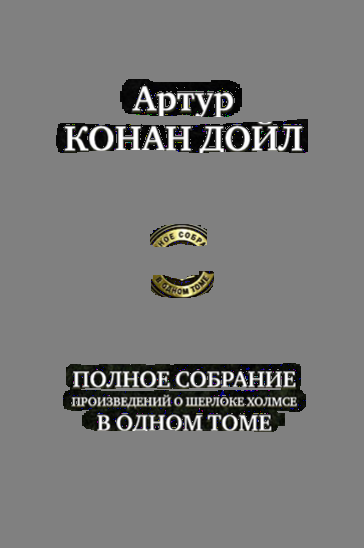

In [39]:
Image.fromarray(np.uint8(output_image))

In [92]:
import onnx
from onnx2pytorch import ConvertModel

transform = transforms.Compose([
    transforms.ToTensor(),
])

onnx_model = onnx.load("end2end.onnx")
pytorch_model = ConvertModel(onnx_model)

def get_masked_image(image, threshold=0.3, mask_padding=5):
    torch_image = transform(image).unsqueeze(0)

    out = pytorch_model(torch_image)
    mask = np.where(out.squeeze(0, 1).detach().numpy() > threshold, 1, 0)

    kernel_size = 2 * mask_padding + 1
    kernel = np.ones((kernel_size, kernel_size), dtype=int)

    mask = convolve2d(mask, kernel, mode='same', boundary='fill', fillvalue=0)

    image_sized = np.array(image.resize(mask.shape[::-1]))

    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    result = np.multiply(image_sized, mask)
    output_image = np.where(result == 0, 128, image_sized)

    return Image.fromarray(np.uint8(output_image))

In [90]:
import onnx
from onnx2pytorch import ConvertModel

transform = transforms.Compose([
    transforms.ToTensor(),
])

onnx_model = onnx.load("end2end.onnx")
pytorch_model = ConvertModel(onnx_model)

def get_masked_image_black_and_white(image, threshold=0.3, mask_padding=5):
    torch_image = transform(image).unsqueeze(0)

    out = pytorch_model(torch_image)
    mask = np.where(out.squeeze(0, 1).detach().numpy() > threshold, 1, 0)

    kernel_size = 2 * mask_padding + 1
    kernel = np.ones((kernel_size, kernel_size), dtype=int)

    mask = convolve2d(mask, kernel, mode='same', boundary='fill', fillvalue=0)

    image_sized = np.array(image.resize(mask.shape[::-1]))

    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    result = np.multiply(image_sized, mask)
    output_image = np.where(result == 0, 128, image_sized)

    return Image.fromarray(np.uint8(output_image))

C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\attribute.py:101: UserWarning: Pytorch's interpolate uses no coordinate_transformation_mode=asymmetric. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolate uses no cubic_coeff_a. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolate uses no nearest_mode. Result might differ.
  warnings.warn(


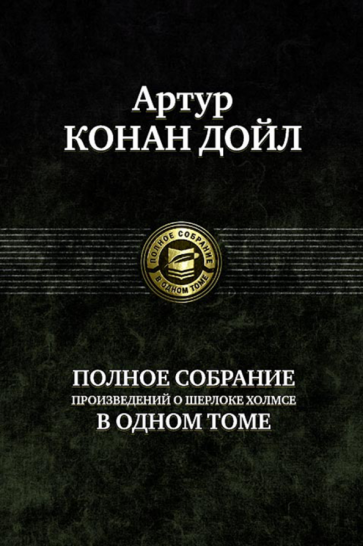

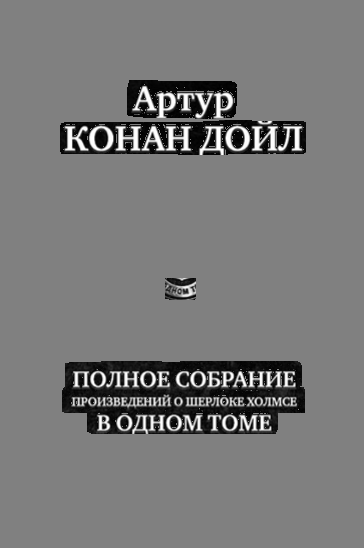

In [94]:
image = Image.open('pics/149372.png').convert('RGB')
display(image)
get_masked_image(image, threshold=0.3, mask_padding=10).convert("L")

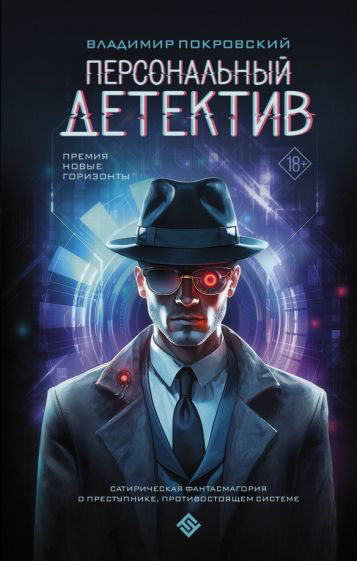

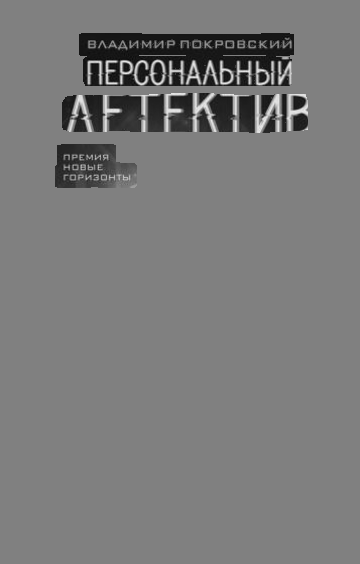

In [95]:
image = Image.open('pics/1010321.png').convert('RGB')
display(image)
get_masked_image(image, threshold=0.5, mask_padding=10).convert("L")

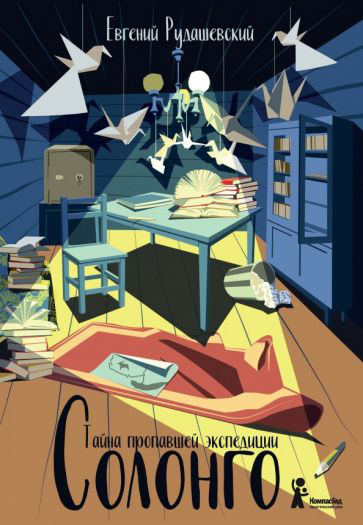

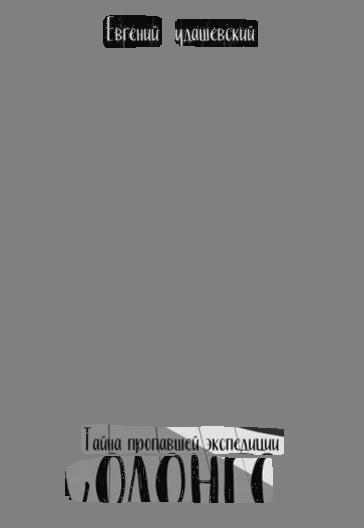

In [102]:
image = Image.open('pics/607770.png').convert('RGB')
display(image)
get_masked_image(image, threshold=0.5, mask_padding=10).convert("L")